In [1]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers.advanced_activations import PReLU
from keras.layers import Input, Conv2D, Concatenate

In [2]:
img_shape = (64,64, 1)
input_img = Input(shape=(img_shape),name = 'X')

#SKIP LAYER LAYER CONNECTION
#01 LAYER
C1 = Conv2D(64, (3, 3), padding='same', name='CONV2D1')(input_img)
C2 = Conv2D(64, (3, 3), padding='same', name='CONV2D2')(C1)

#02 LAYER
C3 = Conv2D(64, (3, 3), padding='same', name='CONV2D3')(input_img)
C4 = Conv2D(64, (3, 3), padding='same', name='CONV2D4')(C3)

In [3]:
#05 CONCATENATION LAYER
output_img = keras.layers.concatenate([C2,C4], axis = -1)
A = PReLU()(output_img)
model = Model(input_img, A)

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
CONV2D1 (Conv2D)                (None, 64, 64, 64)   640         X[0][0]                          
__________________________________________________________________________________________________
CONV2D3 (Conv2D)                (None, 64, 64, 64)   640         X[0][0]                          
__________________________________________________________________________________________________
CONV2D2 (Conv2D)                (None, 64, 64, 64)   36928       CONV2D1[0][0]                    
______________________________________________________________________________________________

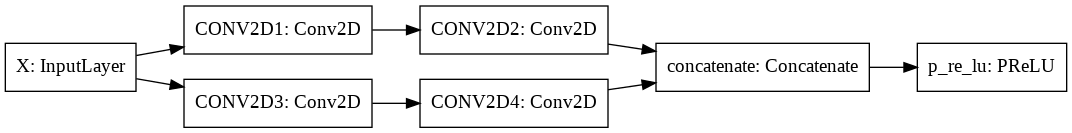

In [5]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [6]:
img_shape = (64,64, 1)
input_img = Input(shape=(img_shape),name = 'X')

#SKIP LAYER LAYER CONNECTION
#01 LAYER
C1 = Conv2D(64, (3, 3), padding='same', name='CONV2D1')(input_img)
C2 = Conv2D(64, (1,1), padding='same', name='CONV2D2')(C1)


#STRAIGHT PATH CONNECTION
#02 LAYER
C3 = Conv2D(64, (3, 3), padding='same', name='CONV2D3')(input_img)
C4 = Conv2D(64, (1,1), padding='same', name='CONV2D4')(C3)


In [7]:
output_img = keras.layers.concatenate([C2,C4], axis = -1)
A = PReLU()(output_img)
model = Model(input_img, A)

In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
CONV2D1 (Conv2D)                (None, 64, 64, 64)   640         X[0][0]                          
__________________________________________________________________________________________________
CONV2D3 (Conv2D)                (None, 64, 64, 64)   640         X[0][0]                          
__________________________________________________________________________________________________
CONV2D2 (Conv2D)                (None, 64, 64, 64)   4160        CONV2D1[0][0]                    
____________________________________________________________________________________________

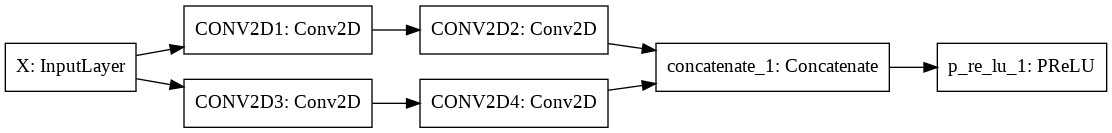

In [9]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)